In [1]:
from pylab import *

%matplotlib inline

In [2]:
rcParams['font.size'] = 14

In [3]:
start = 200
runs = 150
gap = 1
end = start + runs*gap + 1

sim_range = xrange(start, end, gap)
n_bins = 100

N = len(sim_range) - 1
temp_points_rdf = (start, sim_range[N/2], end - 1)

n_time_steps = 2000
dt = 1.0
tot_time = float(n_time_steps * dt)

D = zeros(len(sim_range))
temps = zeros(len(sim_range))
g = zeros((3, n_bins))
x = zeros(g.shape)

idx = [1, 3]

In [4]:
for i, temp_bath in enumerate(sim_range):
    r_msd = loadtxt("msd_{}.txt".format(temp_bath))[-1, 1]
    temps[i] = loadtxt("tmp_t{}.txt".format(temp_bath))[:-100, 1].mean()
    D[i] = r_msd / (6 * tot_time)

for i, temp_bath in enumerate(temp_points_rdf):
    with open("rdf_{}.txt".format(temp_bath)) as infile:
        lines = infile.read().splitlines()
        last_lines = [[float(numb) for numb in line.split(" ")[1:4:2]] for line in lines[-n_bins:]]
        x[i, :], g[i, :] = array([array(line) for line in last_lines]).T
        
sort_idx = argsort(temps)

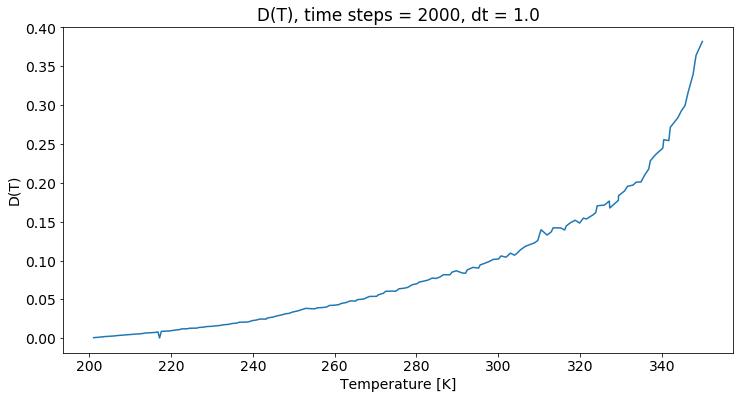

In [5]:
figure(figsize=(12, 6))
title("D(T), time steps = {}, dt = {}".format(n_time_steps, dt))
xlabel("Temperature [K]")
ylabel("D(T)")
plot(temps[sort_idx], D[sort_idx])
show()

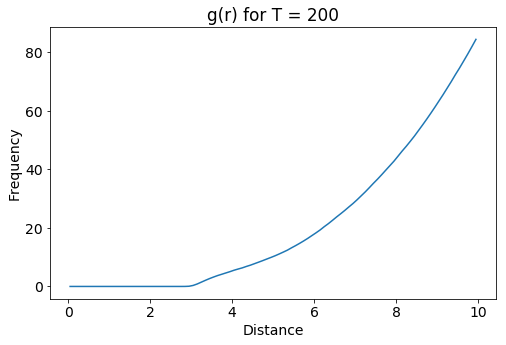

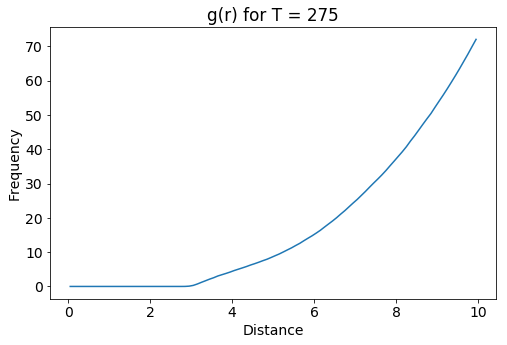

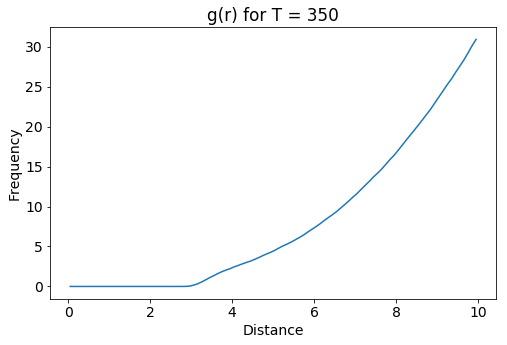

In [9]:
for i in range(len(g[:])):
    figure(figsize=(8,5))
    title("g(r) for T = {}".format(temp_points_rdf[i]))
    xlabel("Distance")
    ylabel("Frequency")
    plot(x[i, :], g[i, :])
    show()

In [7]:
g

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 8.0000e-03, 6.6000e-02,
        3.4000e-01, 8.4000e-01, 1.4640e+00, 2.0880e+00, 2.6820e+00,
        3.2200e+00, 3.7280e+00, 4.1660e+00, 4.6160e+00, 5.0580e+00,
        5.5440e+00, 5.9560e+00, 6.3480e+00, 6.8360e+00, 7.2780e+00,
        7.7920e+00, 8.3060e+00, 8.8320e+00, 9.3800e+00, 9.9160e+00,
        1.0480e+01, 1.1094e+01, 1.1736e+01, 1.2398e+01, 1.3188e+01,
        1.3942e+01, 1.4736e+01, 1.5570e+01, 1.6450e+01, 1.7396e+01,
        1.8332e+01, 1.9312e+01, 2.0428e+01, 2.1456e+01, 2.2578e+01,
        2.3738e+01, 2.4834e+01, 2.5968e+01, 2.7164e+01, 2.8330e+01,
        2.9604e+01, 3.0956e+01, 3.2310e+01, 3.37